In [5]:
# import libraries
import numpy as np
import pandas as pd
import GPy
import sys
sys.path.append('../')
import BayesianOptimization

In [6]:
# Mixed integer nonlinear programming (MINLP) problem with a noise term added to the objective function
# Objective function
# f(x,y,epsilon) = -20*exp(-0.2*sqrt(0.5*(x^2+y^2))) - exp(0.5*(cos(2*pi*x)+cos(2*pi*y))) + e + 20 + \epsilon
# where $\epsilon$ is a noise term that follows a normal distribution with mean 0 and variance $\sigma^2$.
# Constraints
# x^2+y^2≤4
# y \ in {0,1}
# x \ in Reals

# Define the objective function
def f(x, y, epsilon):
    a = 20
    b = 0.2
    c = 2*np.pi
    return -(-a*np.exp(-b*np.sqrt(0.5*(x[:,0]**2 + y[:,0]**2))) - np.exp(0.5*(np.cos(c*x[:,0]) + np.cos(c*y[:,0]))) + np.e + a + epsilon)

# Define the constraints
# equality constraints
def g(x, y):
    G = np.zeros((y.shape[0], 0))
    return G

# inequality constraints
def h(x, y):
    H = np.zeros((y.shape[0], 1))
    H[:,0] = x[:,0]**2 + y[:,0]**2 - 4
    return H

# Number of continuous variables (n)
n = 1
# Number of discrete variables (m)
m = 1
# Bounds
x_l = -20*np.ones(n)
x_u = 20*np.ones(n)
y_l = np.zeros(m, dtype=int)
y_u = np.ones(m, dtype=int)

# Bounds
bounds_x = np.array([x_l, x_u])
bounds_y = np.array([y_l, y_u])

In [7]:
# Load initial data
D_0 = np.loadtxt("initial_data_ex1.csv", delimiter=",")

# Select surrogate model, AF, kernel and sampling strategy
surrogate = 'SGP'
kernel = GPy.kern.RBF(input_dim=2, variance=1.)
adquisition = "EI"
sample_y = "Bernoulli"
sample_x = "Gaussian"
param_est_Bernoulli = "Bayes"
param_est_Gaussian = "Bayes"

def noise_f(mean=0, var=1):
    return np.random.normal(mean, var)

****** iteration ***** 0
omega_max: -3.83 x_max [-0.26] y_max [1.]
****** iteration ***** 1
omega_max: -3.52 x_max [0.15] y_max [1.]
****** iteration ***** 2
omega_max: -2.48 x_max [0.15] y_max [1.]
****** iteration ***** 3
omega_max: -3.04 x_max [0.15] y_max [1.]
****** iteration ***** 4
omega_max: -1.41 x_max [-0.02] y_max [1.]
****** iteration ***** 5
omega_max: -1.56 x_max [0.18] y_max [0.]
****** iteration ***** 6
omega_max: -0.11 x_max [-0.14] y_max [0.]
****** iteration ***** 7
omega_max: -0.38 x_max [-0.14] y_max [0.]
****** iteration ***** 8
omega_max: -2.35 x_max [-0.14] y_max [0.]
****** iteration ***** 9
omega_max:  0.80 x_max [-0.14] y_max [0.]
****** iteration ***** 10
omega_max: -1.34 x_max [-0.14] y_max [0.]
****** iteration ***** 11
omega_max: -0.18 x_max [-0.14] y_max [0.]
****** iteration ***** 12
omega_max: -0.34 x_max [-0.14] y_max [0.]
****** iteration ***** 13
omega_max: -0.35 x_max [-0.14] y_max [0.]
****** iteration ***** 14
omega_max: -1.49 x_max [-0.14] y_max

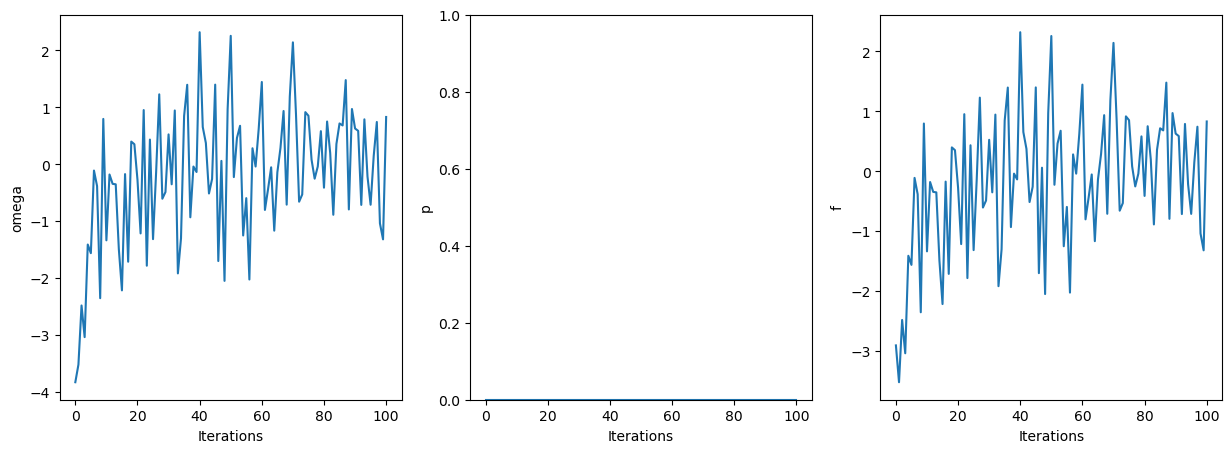

 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


****** iteration ***** 0
omega_max: -3.83 x_max [-0.26] y_max [1.]


 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/stationary.py:353: RuntimeWarning:invalid value encountered in true_divide
 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


****** iteration ***** 1
omega_max: -3.50 x_max [-0.26] y_max [1.]
****** iteration ***** 2
omega_max: -2.55 x_max [0.87] y_max [1.]
****** iteration ***** 3
omega_max: -3.38 x_max [-0.49] y_max [0.]
****** iteration ***** 4
omega_max: -3.13 x_max [-0.49] y_max [0.]
****** iteration ***** 5
omega_max: -2.40 x_max [-0.49] y_max [0.]
****** iteration ***** 6
omega_max: -2.51 x_max [-0.49] y_max [0.]
****** iteration ***** 7
omega_max: -2.36 x_max [-0.49] y_max [0.]
****** iteration ***** 8
omega_max: -3.30 x_max [-0.49] y_max [0.]
****** iteration ***** 9
omega_max: -2.71 x_max [-0.49] y_max [0.]
****** iteration ***** 10
omega_max: -3.40 x_max [-0.49] y_max [0.]
****** iteration ***** 11
omega_max: -3.57 x_max [0.82] y_max [0.]
****** iteration ***** 12
omega_max: -4.93 x_max [0.82] y_max [0.]
****** iteration ***** 13
omega_max: -3.11 x_max [0.82] y_max [0.]
****** iteration ***** 14
omega_max: -1.78 x_max [0.82] y_max [0.]
****** iteration ***** 15
omega_max: -1.14 x_max [0.82] y_max 

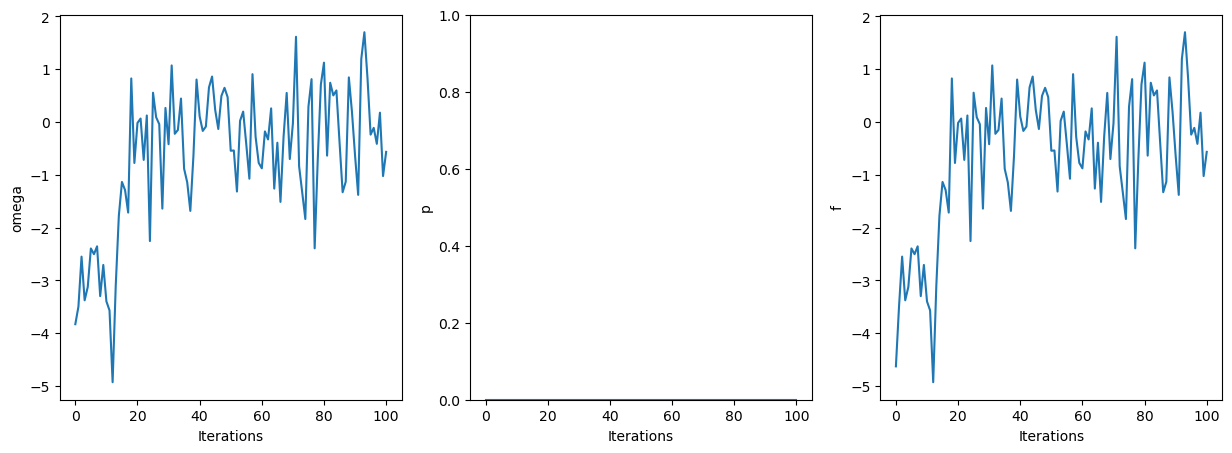

 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


****** iteration ***** 0
omega_max: -3.83 x_max [-0.26] y_max [1.]
****** iteration ***** 1
omega_max: -1.72 x_max [-0.26] y_max [1.]
****** iteration ***** 2
omega_max: -5.59 x_max [-0.26] y_max [1.]
****** iteration ***** 3
omega_max: -2.90 x_max [-0.26] y_max [1.]


 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


****** iteration ***** 4
omega_max: -3.47 x_max [-0.26] y_max [1.]
****** iteration ***** 5
omega_max: -1.96 x_max [-0.26] y_max [1.]


 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/stationary.py:353: RuntimeWarning:invalid value encountered in true_divide


****** iteration ***** 6
omega_max: -2.25 x_max [-0.26] y_max [1.]
****** iteration ***** 7
omega_max: -4.33 x_max [-0.26] y_max [1.]
****** iteration ***** 8
omega_max: -2.09 x_max [1.02] y_max [1.]
****** iteration ***** 9
omega_max: -1.24 x_max [-0.93] y_max [0.]
****** iteration ***** 10
omega_max: -1.04 x_max [-0.93] y_max [0.]
****** iteration ***** 11
omega_max: -4.44 x_max [-0.93] y_max [0.]
****** iteration ***** 12
omega_max: -2.42 x_max [-0.93] y_max [0.]
****** iteration ***** 13
omega_max: -2.74 x_max [0.94] y_max [0.]
****** iteration ***** 14
omega_max: -3.43 x_max [0.94] y_max [0.]
****** iteration ***** 15
omega_max: -3.27 x_max [0.94] y_max [0.]
****** iteration ***** 16
omega_max: -2.84 x_max [0.94] y_max [0.]
****** iteration ***** 17
omega_max: -2.85 x_max [0.94] y_max [0.]
****** iteration ***** 18
omega_max: -1.41 x_max [0.94] y_max [0.]
****** iteration ***** 19
omega_max: -2.40 x_max [0.94] y_max [0.]
****** iteration ***** 20
omega_max: -2.91 x_max [0.94] y_ma

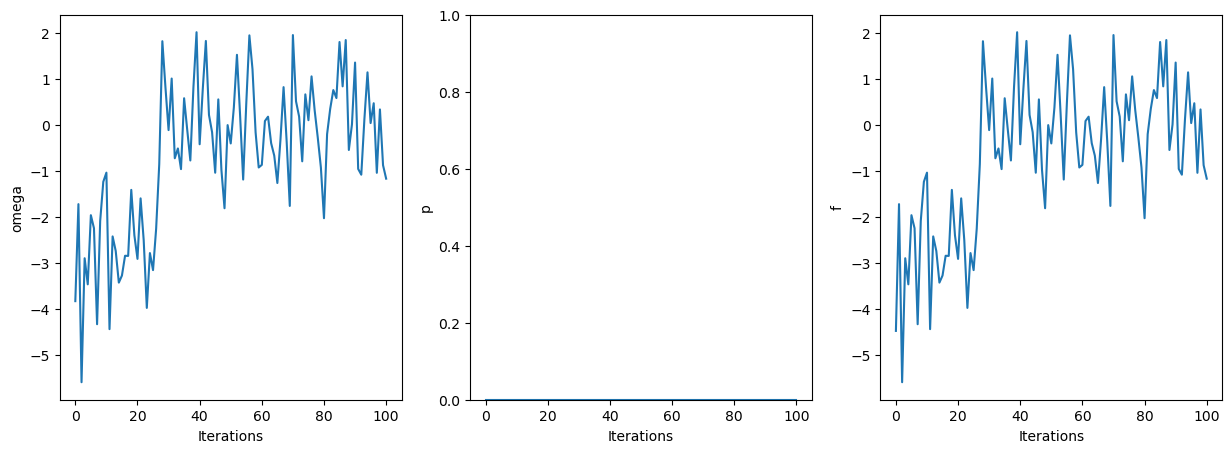

 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


****** iteration ***** 0
omega_max: -3.83 x_max [-0.26] y_max [1.]


 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/stationary.py:353: RuntimeWarning:invalid value encountered in true_divide


****** iteration ***** 1
omega_max: -2.82 x_max [-0.] y_max [1.]
****** iteration ***** 2
omega_max: -2.84 x_max [-0.3] y_max [0.]
****** iteration ***** 3
omega_max: -2.52 x_max [0.01] y_max [0.]
****** iteration ***** 4
omega_max: -0.73 x_max [0.01] y_max [0.]
****** iteration ***** 5
omega_max: -1.61 x_max [0.01] y_max [0.]
****** iteration ***** 6
omega_max:  1.66 x_max [0.01] y_max [0.]
****** iteration ***** 7
omega_max:  1.09 x_max [0.01] y_max [0.]
****** iteration ***** 8
omega_max:  1.00 x_max [0.01] y_max [0.]
****** iteration ***** 9
omega_max:  0.62 x_max [0.01] y_max [0.]
****** iteration ***** 10
omega_max: -0.17 x_max [0.01] y_max [0.]
****** iteration ***** 11
omega_max: -1.15 x_max [0.01] y_max [0.]
****** iteration ***** 12
omega_max:  1.03 x_max [0.01] y_max [0.]
****** iteration ***** 13
omega_max:  0.36 x_max [0.01] y_max [0.]
****** iteration ***** 14
omega_max: -0.31 x_max [0.01] y_max [0.]
****** iteration ***** 15
omega_max: -0.52 x_max [0.01] y_max [0.]
*****

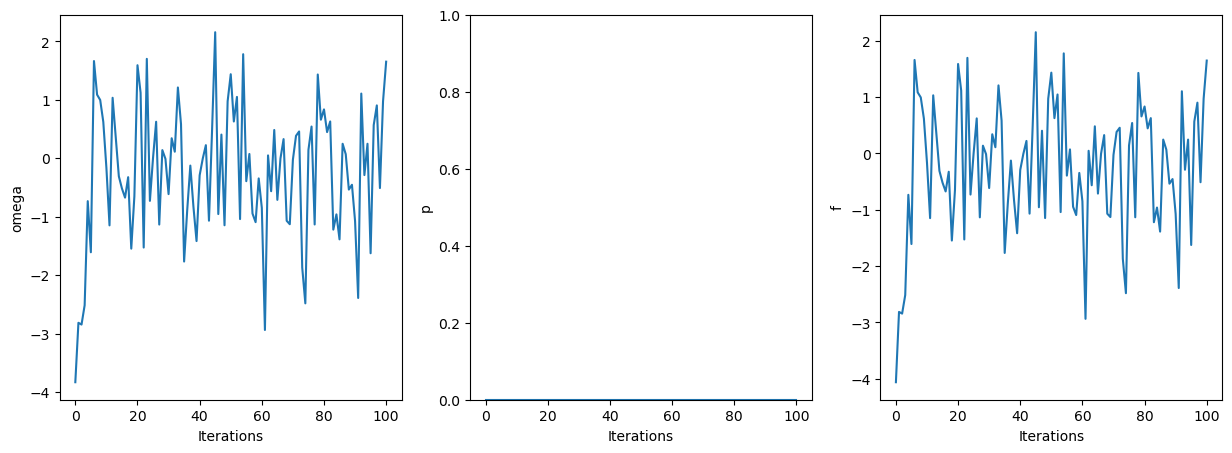

 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/stationary.py:353: RuntimeWarning:invalid value encountered in true_divide
 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /Users/javiermorlet/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


****** iteration ***** 0
omega_max: -3.83 x_max [-0.26] y_max [1.]
****** iteration ***** 1
omega_max: -3.01 x_max [-0.26] y_max [1.]
****** iteration ***** 2
omega_max: -4.06 x_max [-0.26] y_max [1.]
****** iteration ***** 3
omega_max: -4.28 x_max [-0.26] y_max [1.]
****** iteration ***** 4
omega_max: -3.72 x_max [-0.26] y_max [1.]
****** iteration ***** 5
omega_max: -3.57 x_max [-0.26] y_max [1.]
****** iteration ***** 6
omega_max: -2.34 x_max [0.23] y_max [0.]
****** iteration ***** 7
omega_max: -2.14 x_max [0.23] y_max [0.]
****** iteration ***** 8
omega_max: -1.81 x_max [0.23] y_max [0.]
****** iteration ***** 9
omega_max: -2.96 x_max [0.23] y_max [0.]
****** iteration ***** 10
omega_max: -2.41 x_max [0.23] y_max [0.]
****** iteration ***** 11
omega_max: -1.98 x_max [0.23] y_max [0.]
****** iteration ***** 12
omega_max: -2.00 x_max [0.23] y_max [0.]
****** iteration ***** 13
omega_max: -1.36 x_max [0.23] y_max [0.]
****** iteration ***** 14
omega_max: -0.35 x_max [0.23] y_max [0.]

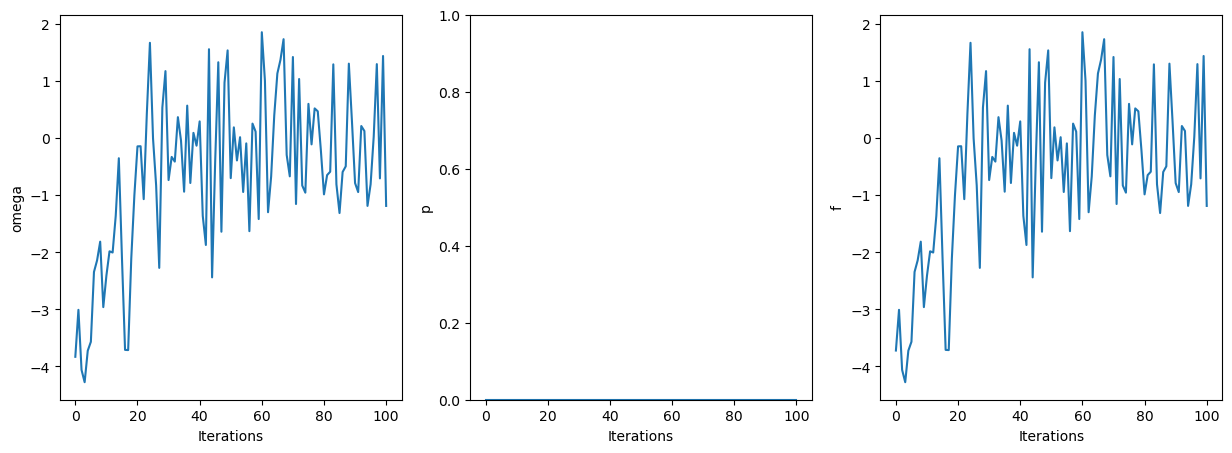

In [8]:
labels_D = ["x", "y", "Omega"]
labels_D_best = ["x", "y", "Omega", "p", "f"]
points = 50
for i in range(5):
    # Run the optimization 10 times, save the solutions with tuples
    bo = BayesianOptimization.BO_GPy(f, g, h, noise_f, None, None, bounds_x, bounds_y, kernel, n, m,
                                    points = points, t_max = 100, j_max = 50,
                                    surrogate = surrogate, adquisition = adquisition, 
                                    sample_y = sample_y, sample_x = sample_x, param_est_bernoulli = param_est_Bernoulli, param_est_gaussian = param_est_Gaussian,
                                    D_0 = D_0, early_stop=False, DomainReduction=False, verbose=True)
    D, D_best = bo.fit()
    df_D = pd.DataFrame(D, columns=labels_D)
    df_D_best = pd.DataFrame(D_best, columns=labels_D_best)
    df_D.to_csv("Example_1_final" + ".csv", index=False, mode="a")
    df_D_best.to_csv("Example_1_best_final" + ".csv", index=False, mode="a")